# Modeling Heat Transfer in a Rocket Nozzle Throat
## James Ho and Jinfay Justin Yuan

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [160]:
def make_system(twg,twc,tco):
    """
    A function that returns a system object with a state called init
    The current system
    
    twg = Hot gas side local wall temperature
    twc = Coolant side local wall temperature
    tco = Temperature of Coolant Liquid (water)
    taw = Temperature of the hot combustion gases (K)
    hg = hot gas side heat transfer co-effficient = 2956
    k = thermal conductivity of Al 6061, W/(m*K)
    thickness = thickness of Al 6061 wall (m)
    hc = coolant side heat transfer co-efficient
    t_0 = intitial time 
    t_end = final time
    
    """
    system = System(init = State(twg = twg, twc = twc, tco = tco),
                    taw = 2956,
                    hg = 2187,
                    k = 167 ,
                    thickness = .00238125,
                    hc = 32369,
                    q =  4905759, 
                    t_0 = 0,
                    t_end = 100)
    return system

In [166]:
def update_func(state,t,system):
    """Test update"""

    unpack(system)
    twg1, twc1, tco1 = state
    
    dtwg = -1 * ((q/hg) - taw)   
    dtwc = -1 * (((q*thickness)/k) - twg1)
    dtco = -1 * ((q/hc) - twc1)
    
    
    twg1 += dtwg * .01
    twc1 += dtwc * .01 
    tco1 -= dtco * .01
    
    return State(twg = twg1,
                 twc = twc1,
                 tco = tco1)

In [167]:
def slope_func(state, t, system):
    """
    Function that calculates the current change in temperature over time given current state
    """
    twg, twc, tco = state
    twg1 = -((system.q/system.hg) - system.taw)
    twc1 = -(((system.q*system.thickness)/system.k) - twg)
    tco1 = -((system.q/system.hc) - twc)
    return twg1, twc1, tco1

In [168]:
resultsODE, details = run_ode_solver(system, slope_func)

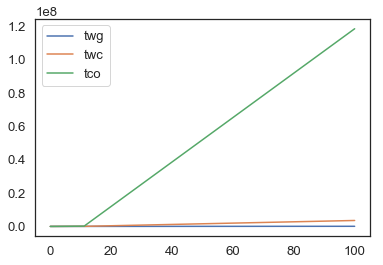

In [169]:
resultsODE.plot()

In [170]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    frame.index / 100
    return frame

In [171]:
def plot_results(twg,twc,tco):

    plot(twg, '--', label='twg')
    plot(twc, '-', label='twc')
    plot(tco, '-', label='tco')
    
    decorate(xlabel='Time',
             ylabel='Temperature')

In [172]:
system = make_system(0,0,0)


,values
init,twg 0 twc 0 tco 0 dtype: int64
taw,2956
hg,2187
k,167
thickness,0.00238125
hc,32369
q,4905759
t_0,0
t_end,100


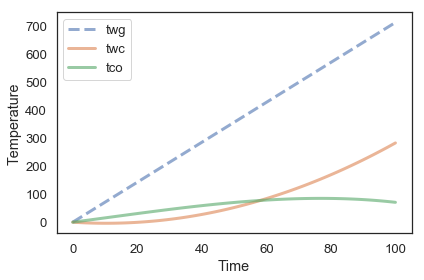

In [173]:
results = run_simulation(system, update_func)
plot_results(results.twg,results.twc, results.tco)
